In [1]:
import os, skimage.io,matplotlib.pyplot as plt, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

Using TensorFlow backend.


Loading data from the computer be using data directory path.

In [145]:
def load_data(data_directory):
    directories = [d for d in os .listdir(data_directory) if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images =[]
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        
        file_names = [os.path.join(label_directory, f)
            for f in os.listdir(label_directory)]
        
        for f in file_names:
            images.append(skimage.io.imread(f))
            labels.append(int(d))
    return images, labels

Read data and divide it into the 2 parts: Training and Testing.
The current part is from masos ~/ Documents/FashionData/    

In [159]:
train_data_path = os.path.join(os.getcwd(),"Documents","FashionData","training")
test_data_path = os.path.join(os.getcwd(),"Documents","FashionData","testing")
images, labels = load_data(train_data_path)
test_images,test_labels = load_data(test_data_path)
images = np.asarray(images)
test_images = np.asarray(test_images)
labels = np.asarray(labels)
test_labels = np.asarray(test_labels)

Divide input data into two training set and testing set. 90% of data will go to training set and 10% will 
go to testing set.

In [160]:
train_images,validation_images,train_labels,validation_labels = train_test_split(images, labels, train_size=0.9, 
                                                                                 test_size=0.1,random_state=0)

In [99]:
print(train_images.shape,train_labels.shape,validation_images.shape,validation_labels.shape,
      test_images.shape,test_labels.shape)

(54000, 28, 28) (54000,) (6000, 28, 28) (6000,) (10000, 28, 28) (10000,)


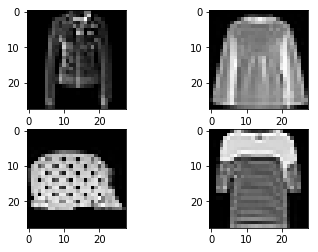

In [100]:
# plot 4 images as grayscale
plt.subplot(221)
plt.imshow(train_images[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(train_images[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(train_images[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(train_images[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

Pre-procesing the data with scale them 28x28 pixel with the range from 0 to 255.

In [48]:
num_pixels = train_images.shape[1] * train_images.shape[2]
train_images = train_images.reshape(train_images.shape[0],
num_pixels).astype('float32')
validation_images = validation_images.reshape(validation_images.shape[0],
num_pixels).astype('float32')
test_images = test_images.reshape(test_images.shape[0], num_pixels).astype('float32')

In [49]:
train_images = train_images/255
validation_images = validation_images/255
test_images = test_images/255

Read choosing number of hidden node is at the end of the file.
After calculations and cosiderations, the optimal hidden node is 430.

In [50]:
# less than 10 category and more than 10 using shape 1
train_labels = np_utils.to_categorical(train_labels)
validation_labels = np_utils.to_categorical(validation_labels)
test_labels = np_utils.to_categorical(test_labels)
num_classes = train_labels.shape[1]

In [38]:
# optimal number of hidden node: 430
model = Sequential()
model.add(Dense(430, input_dim=num_pixels, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 33s 614us/step - loss: 0.4909 - acc: 0.8255 - val_loss: 0.3929 - val_acc: 0.8582
Epoch 2/10
54000/54000 [==============================] - 31s 582us/step - loss: 0.3666 - acc: 0.8657 - val_loss: 0.3368 - val_acc: 0.8777
Epoch 3/10
54000/54000 [==============================] - 30s 560us/step - loss: 0.3263 - acc: 0.8804 - val_loss: 0.3182 - val_acc: 0.8832
Epoch 4/10
54000/54000 [==============================] - 30s 553us/step - loss: 0.3054 - acc: 0.8860 - val_loss: 0.3037 - val_acc: 0.8900
Epoch 5/10
54000/54000 [==============================] - 30s 558us/step - loss: 0.2856 - acc: 0.8943 - val_loss: 0.3068 - val_acc: 0.8862
Epoch 6/10
54000/54000 [==============================] - 31s 568us/step - loss: 0.2690 - acc: 0.9009 - val_loss: 0.3081 - val_acc: 0.8860
Epoch 7/10
54000/54000 [==============================] - 32s 601us/step - loss: 0.2555 - acc: 0.9047 - val_loss: 0.2

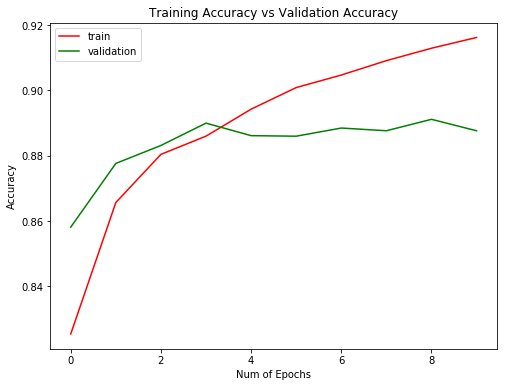

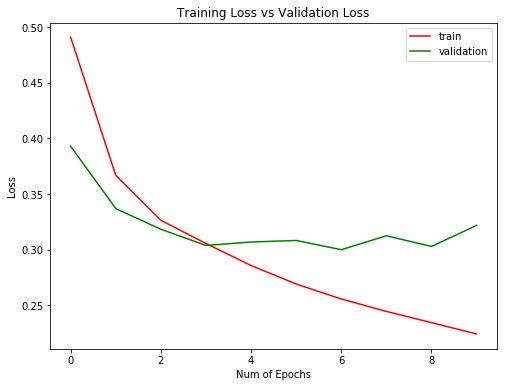

In [21]:
#epochs = 10
history = model.fit(train_images, train_labels,
validation_data=(validation_images,validation_labels), epochs=10)
training_accuracy = history.history['acc']
validation_accuracy = history.history['val_acc']
training_error = history.history['loss']
validation_error = history.history['val_loss']
plt.figure(0)
plt.plot(training_accuracy,'r')
plt.plot(validation_accuracy,'g')
plt.xticks(np.arange(0, len(training_accuracy), 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
plt.figure(1)
plt.plot(training_error,'r')
plt.plot(validation_error,'g')
plt.xticks(np.arange(0, len(training_accuracy), 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

Here is the metrics evaluation for the number of hidden node 430 (optimal)

In [12]:
scores = model.evaluate(test_images, test_labels, verbose=0)
print("MLP Error on test set: %.2f%%" % (100-scores[1]*100))
print("MLP Accuracy on test set: %.2f%%" % (scores[1]*100))

MLP Error on test set: 12.53%
MLP Accuracy on test set: 87.47%


Using number of hidden node of hidden node 430 to do the Kfold

In [13]:
# using estimated optimal number of hidden nodes: 430
images = images.reshape(images.shape[0], num_pixels).astype('float32')
images = images/255
temp_labels = labels
labels = np_utils.to_categorical(labels)
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_acc = []
cv_error = []
for train, test in kfold.split(images, temp_labels):
    # create model
    model = Sequential()
    model.add(Dense(430, input_dim=num_pixels, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',
    metrics=['accuracy'])
    # Fit the model
    model.fit(images[train], labels[train], epochs=10, verbose=0)
    # evaluate the model
    scores = model.evaluate(images[test], labels[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cv_acc.append(scores[1] * 100)
    cv_error.append(100-scores[1] * 100)
    print("Cross Validation Accuracy %.2f%% (+/- %.2f%%)" % (np.mean(cv_acc),
    np.std(cv_acc)))
    print("Cross Validation Error %.2f%% (+/- %.2f%%)" % (np.mean(cv_error),
    np.std(cv_error)))
    scores = model.evaluate(test_images, test_labels, verbose=0)
    print("MLP Error on test set: %.2f%%" % (100-scores[1]*100))
    print("MLP Accuracy on test set: %.2f%%" % (scores[1]*100))

acc: 89.22%
Cross Validation Accuracy 89.22% (+/- 0.00%)
Cross Validation Error 10.78% (+/- 0.00%)
MLP Error on test set: 11.59%
MLP Accuracy on test set: 88.41%
acc: 89.12%
Cross Validation Accuracy 89.17% (+/- 0.05%)
Cross Validation Error 10.83% (+/- 0.05%)
MLP Error on test set: 11.72%
MLP Accuracy on test set: 88.28%
acc: 88.78%
Cross Validation Accuracy 89.04% (+/- 0.19%)
Cross Validation Error 10.96% (+/- 0.19%)
MLP Error on test set: 12.13%
MLP Accuracy on test set: 87.87%
acc: 88.83%
Cross Validation Accuracy 88.99% (+/- 0.19%)
Cross Validation Error 11.01% (+/- 0.19%)
MLP Error on test set: 11.97%
MLP Accuracy on test set: 88.03%
acc: 89.95%
Cross Validation Accuracy 89.18% (+/- 0.42%)
Cross Validation Error 10.82% (+/- 0.42%)
MLP Error on test set: 11.34%
MLP Accuracy on test set: 88.66%


In [14]:
# add description to labels
def label_to_description(a):
    label_arr = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'boot']
    selectedLabel =''
    for index in range (0,10):
        if (index == a):
            selectedLabel = label_arr[index]
            break
    return selectedLabel            

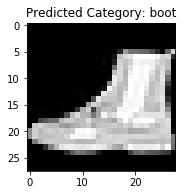

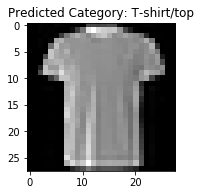

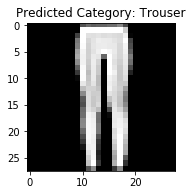

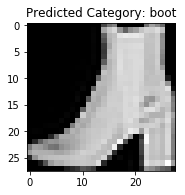

In [24]:
#test model
import random
for index in range (0,4):
    image_index = random.randint(0,test_images.shape[0])
    random_image = test_images[image_index]
    random_label = model.predict(random_image.reshape(1,random_image.shape[0])).argmax(axis=-1)
    plt.subplot(211)
    plt.imshow(random_image.reshape(28,28), cmap=plt.get_cmap('gray'))
    label_des = label_to_description(random_label)
    plt.title("Predicted Category: "+str(label_des))
    plt.show()


Change number of Hidden node to see which is the optimal hidden node
the selected number are 78, 254, 430, 606,748

Summary the model

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 430)               337550    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                4310      
Total params: 341,860
Trainable params: 341,860
Non-trainable params: 0
_________________________________________________________________


In [17]:
import statistics
train_list = []
val_list = []
node_list = []
number_hidden_note = [78, 254, 430, 606,748]
for index in number_hidden_note:
    print
    model = Sequential()
    model.add(Dense(index, input_dim=num_pixels, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(train_images, train_labels,
    validation_data=(validation_images,validation_labels), epochs=10)
    training_accuracy = history.history['acc']
    validation_accuracy = history.history['val_acc']
    training_error = history.history['loss']
    validation_error = history.history['val_loss']
    print("Testing on number of hidden node: " +str(index))
    train_acc = statistics.mean(training_accuracy)
    val_acc = statistics.mean(validation_accuracy)
    train_list.append(train_acc)
    val_list.append(val_acc)
    node_list.append(index)


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 16s 305us/step - loss: 0.5295 - acc: 0.8167 - val_loss: 0.3926 - val_acc: 0.8652
Epoch 2/10
54000/54000 [==============================] - 16s 295us/step - loss: 0.3981 - acc: 0.8583 - val_loss: 0.3686 - val_acc: 0.8700
Epoch 3/10
54000/54000 [==============================] - 16s 290us/step - loss: 0.3561 - acc: 0.8727 - val_loss: 0.3636 - val_acc: 0.8667
Epoch 4/10
54000/54000 [==============================] - 15s 284us/step - loss: 0.3317 - acc: 0.8796 - val_loss: 0.3294 - val_acc: 0.8820
Epoch 5/10
54000/54000 [==============================] - 15s 283us/step - loss: 0.3126 - acc: 0.8871 - val_loss: 0.3380 - val_acc: 0.8778
Epoch 6/10
54000/54000 [==============================] - 15s 281us/step - loss: 0.3002 - acc: 0.8894 - val_loss: 0.3227 - val_acc: 0.8837
Epoch 7/10
54000/54000 [==============================] - 15s 282us/step - loss: 0.2862 - acc: 0.8943 - val_loss: 0.3

Format the output

In [19]:
print("Train Acc\t\tValidate Acc\t\tNumber of Node ")

for x, y, z in zip(train_list, val_list, node_list):
    print("%.5f" % x,"%.5f" %  y, z, sep='\t\t\t')

Train Acc		Validate Acc		Number of Node 
0.87996			0.87878			78
0.88855			0.88570			254
0.88949			0.88167			430
0.89037			0.88170			606
0.88995			0.88453			748


Apply on the test set to check the performance.

Now we use the model on the test folder known as unseen data.

In [161]:
train_images,validation_images,train_labels,validation_labels = train_test_split(test_images, test_labels, train_size=0.9, 
                                                                                 test_size=0.1,random_state=0)

In [162]:
# Size is different on test set, smaller.
print(train_images.shape,train_labels.shape,validation_images.shape,validation_labels.shape,
      test_images.shape,test_labels.shape)

(9000, 28, 28) (9000,) (1000, 28, 28) (1000,) (10000, 28, 28) (10000,)


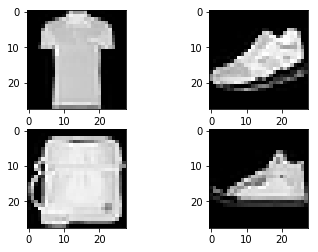

In [163]:
# plot 4 images as grayscale
plt.subplot(221)
plt.imshow(train_images[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(train_images[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(train_images[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(train_images[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [164]:
num_pixels = train_images.shape[1] * train_images.shape[2]
train_images = train_images.reshape(train_images.shape[0],
num_pixels).astype('float32')
validation_images = validation_images.reshape(validation_images.shape[0],
num_pixels).astype('float32')
test_images = test_images.reshape(test_images.shape[0], num_pixels).astype('float32')

In [165]:
train_images = train_images/255
validation_images = validation_images/255
test_images = test_images/255

In [166]:
# less than 10 category and more than 10 using shape 1
train_labels = np_utils.to_categorical(train_labels)
validation_labels = np_utils.to_categorical(validation_labels)
test_labels = np_utils.to_categorical(test_labels)
num_classes = train_labels.shape[1]

In [169]:
# using estimated optimal number of hidden nodes: 430 in test data set.
images = images.reshape(images.shape[0], num_pixels).astype('float32')
images = images/255
temp_labels = labels
labels = np_utils.to_categorical(labels)
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_acc = []
cv_error = []
for train, test in kfold.split(images, temp_labels):
    # create model
    model = Sequential()
    model.add(Dense(430, input_dim=num_pixels, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',
    metrics=['accuracy'])
    # Fit the model
    model.fit(images[train], labels[train], epochs=10, verbose=0)
    # evaluate the model
    scores = model.evaluate(images[test], labels[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cv_acc.append(scores[1] * 100)
    cv_error.append(100-scores[1] * 100)
    print("Cross Validation Accuracy %.2f%% (+/- %.2f%%)" % (np.mean(cv_acc),
    np.std(cv_acc)))
    print("Cross Validation Error %.2f%% (+/- %.2f%%)" % (np.mean(cv_error),
    np.std(cv_error)))
    scores = model.evaluate(test_images, test_labels, verbose=0)
    print("MLP Error on test set: %.2f%%" % (100-scores[1]*100))
    print("MLP Accuracy on test set: %.2f%%" % (scores[1]*100))

acc: 89.24%
Cross Validation Accuracy 89.24% (+/- 0.00%)
Cross Validation Error 10.76% (+/- 0.00%)
MLP Error on test set: 11.19%
MLP Accuracy on test set: 88.81%
acc: 88.88%
Cross Validation Accuracy 89.06% (+/- 0.18%)
Cross Validation Error 10.94% (+/- 0.18%)
MLP Error on test set: 11.65%
MLP Accuracy on test set: 88.35%
acc: 89.48%
Cross Validation Accuracy 89.20% (+/- 0.24%)
Cross Validation Error 10.80% (+/- 0.24%)
MLP Error on test set: 11.64%
MLP Accuracy on test set: 88.36%
acc: 88.46%
Cross Validation Accuracy 89.01% (+/- 0.38%)
Cross Validation Error 10.99% (+/- 0.38%)
MLP Error on test set: 12.42%
MLP Accuracy on test set: 87.58%
acc: 87.52%
Cross Validation Accuracy 88.72% (+/- 0.69%)
Cross Validation Error 11.28% (+/- 0.69%)
MLP Error on test set: 13.11%
MLP Accuracy on test set: 86.89%
